In [1]:
##################################################################################################
##################################################################################################


### This file and the source code provided can be used only for the projects and assignments  
### of this course

### Last Edit by Dr. Atef Bader: 12/27/2018


##################################################################################################
##################################################################################################



# ElasticSearch

- Download __[elasticsearch](https://www.elastic.co/downloads/elasticsearch)__  to your laptop
- Getting Started with  __[elasticsearch](https://www.elastic.co/start)__ 



## The three major platofrms are supported:
1. Windows
2. MacOS
3. Linux



## Startup ElasticSearch Server

After you install ElasticSearch, go to the directory where you installed ElasticSearch under \bin directory and type from the terminal/command prompt the following command:
**elasticsearch**



## elasticsearch package

We need __[elasticsearch](https://anaconda.org/anaconda/elasticsearch)__  package to connect to ElasticSearch Servers

To install elastic search pakage, execute following command from the command/terminal windows:
- ** conda install -c anaconda elasticsearch **    



# Yelp

### You need to install Yelp API package before you run this script

- pip install yelpapi


### Here is the official URL for Yelp API docs:

https://www.yelp.com/developers/documentation/v3/get_started


### Use the business search on terms and sort on terms:
    
    https://www.yelp.com/developers/documentation/v3/business_search
    


# Chicago Social Hub


We are interested to collect data about Chicago businesses from Yelp





# Why use Yelp data?

Imagine you are visiting Chicago for the first time and you like to get an idea about popular restaurants that serve Chicago-Style Food? 
- Chicago Style Hotdogs
- Chicago Style Pizza




## Yelp has a significant dominance in US-traffic for consumer and busibess reviews; see below the rank of Yelp in the top-ten list


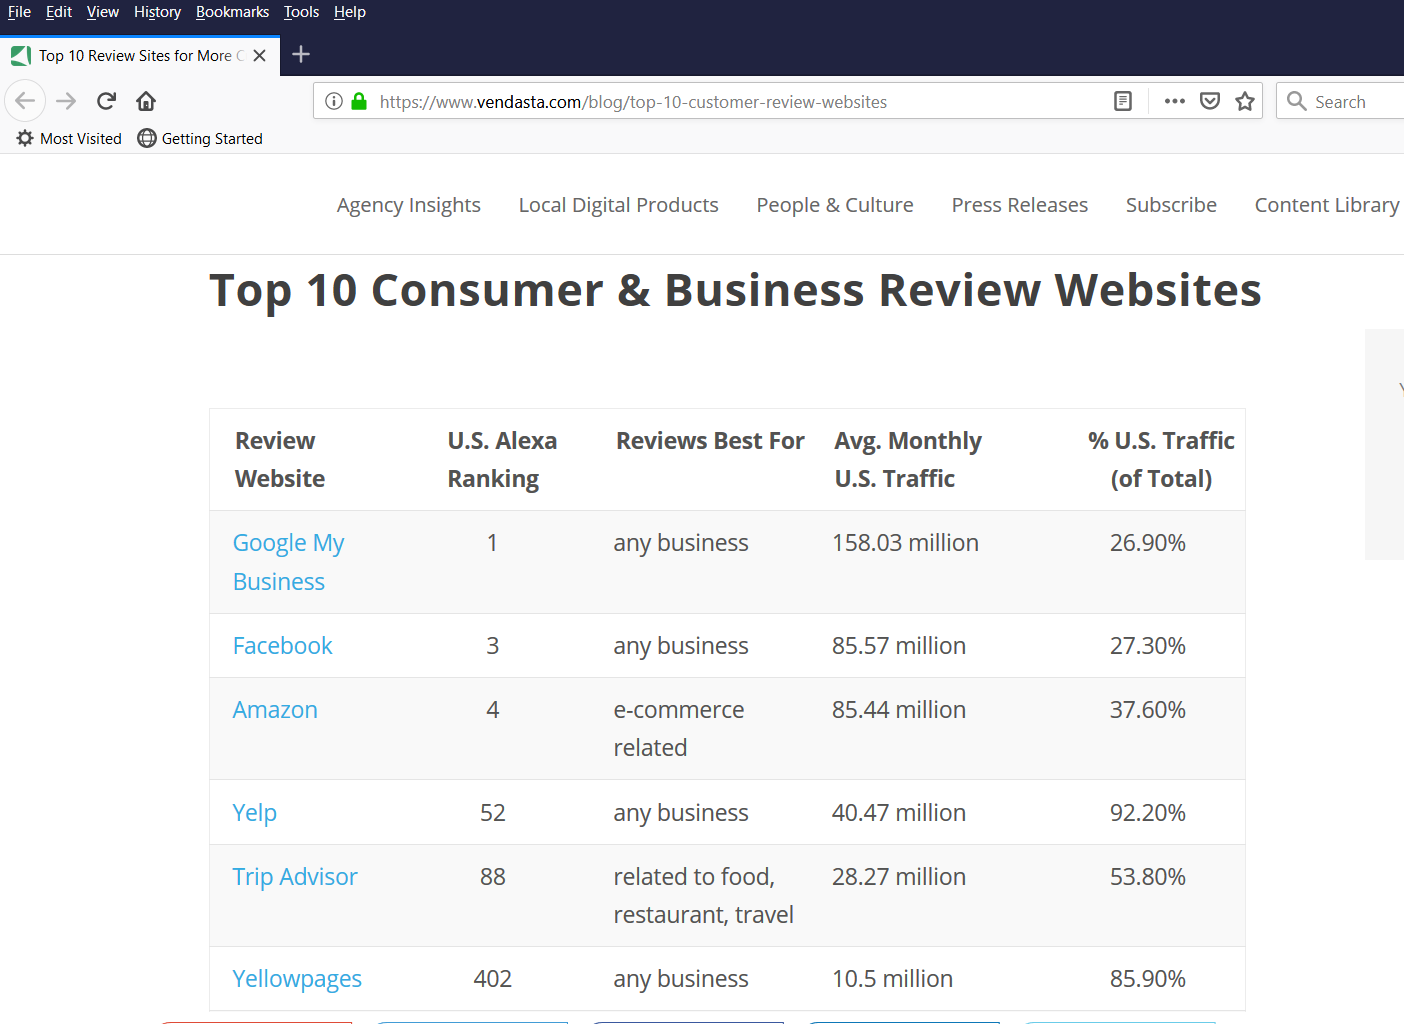




### Create your API Key:

Here is the URL for the developer API  in order to generate your App Key

https://www.yelp.com/developers/v3/manage_app





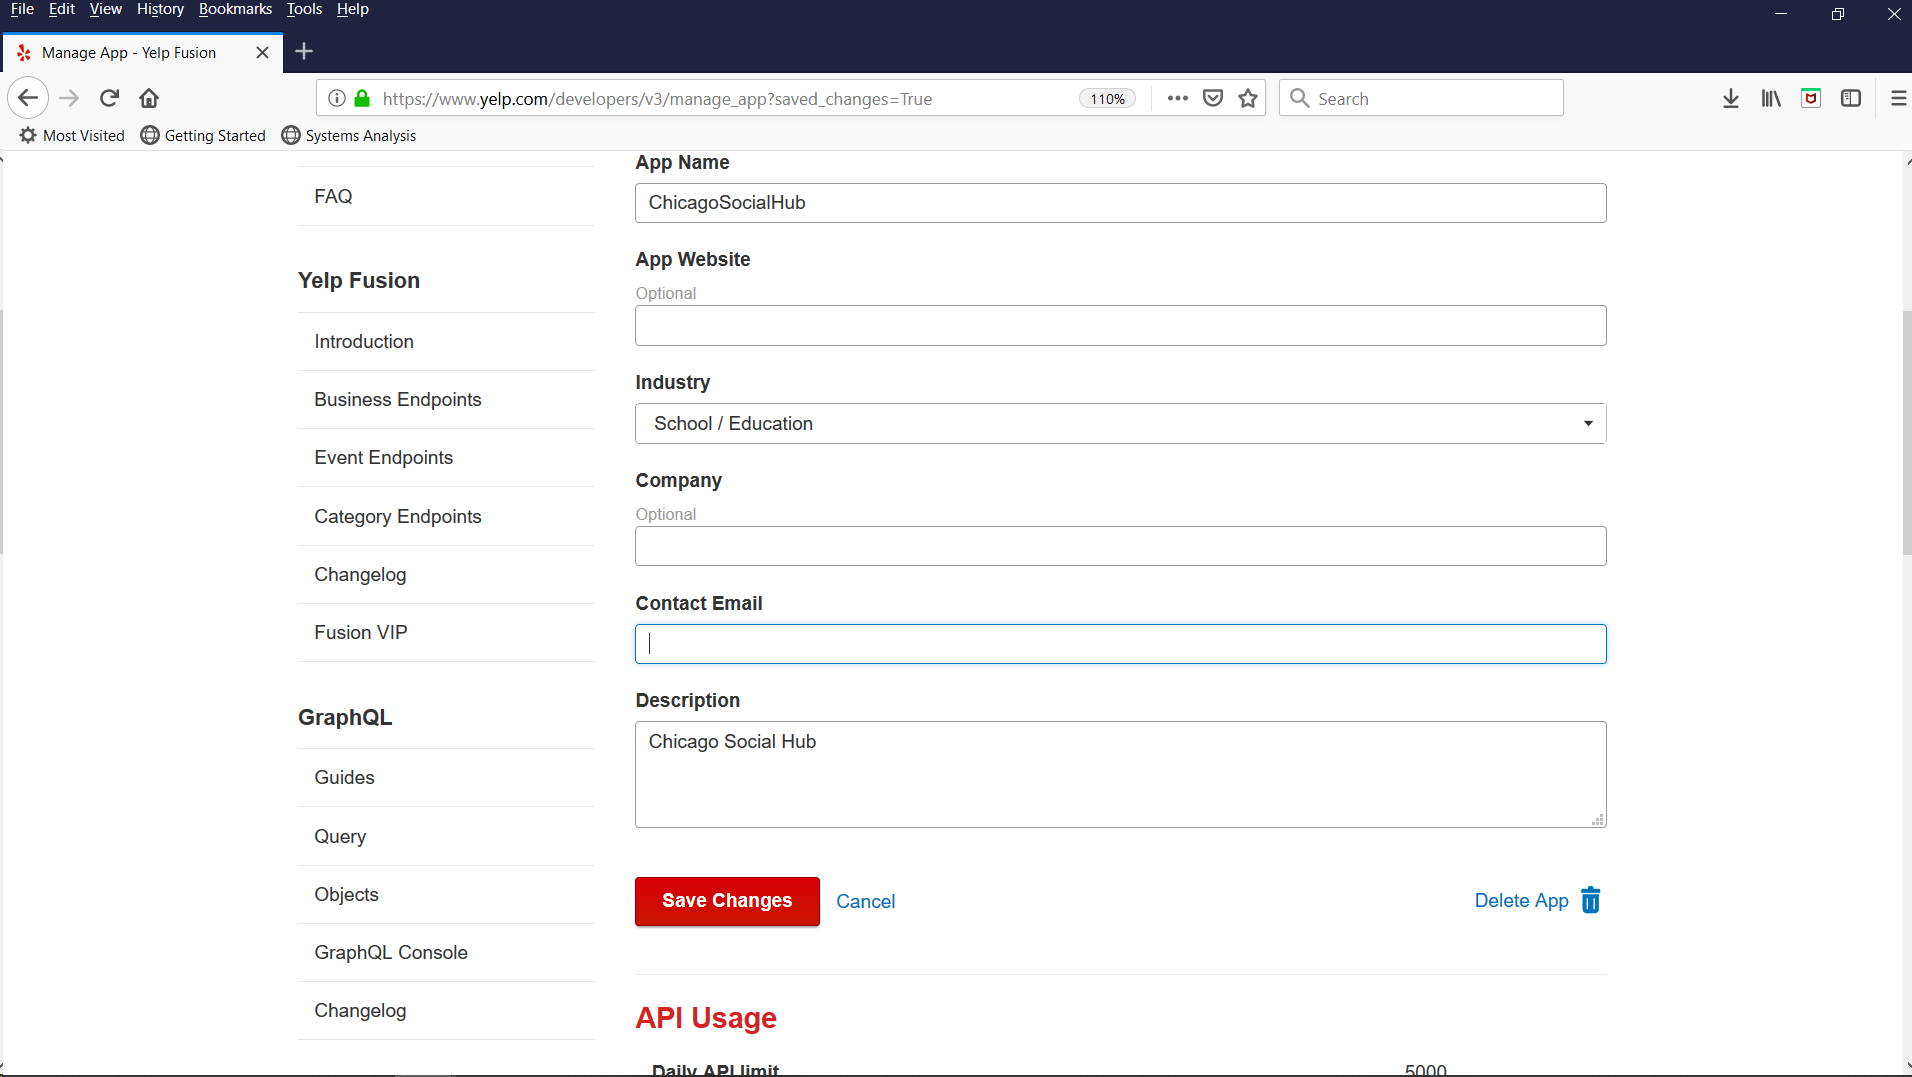




### Make a note of the following restrictions:

- The API **limit**  ,which is optional, can be used to specify the number of business results to return. By default, it will return 20. Maximum is 50.
- You have 5000 Yelp-API calls per day

See image below as an example and keep this in mind when you make calls to Yelp

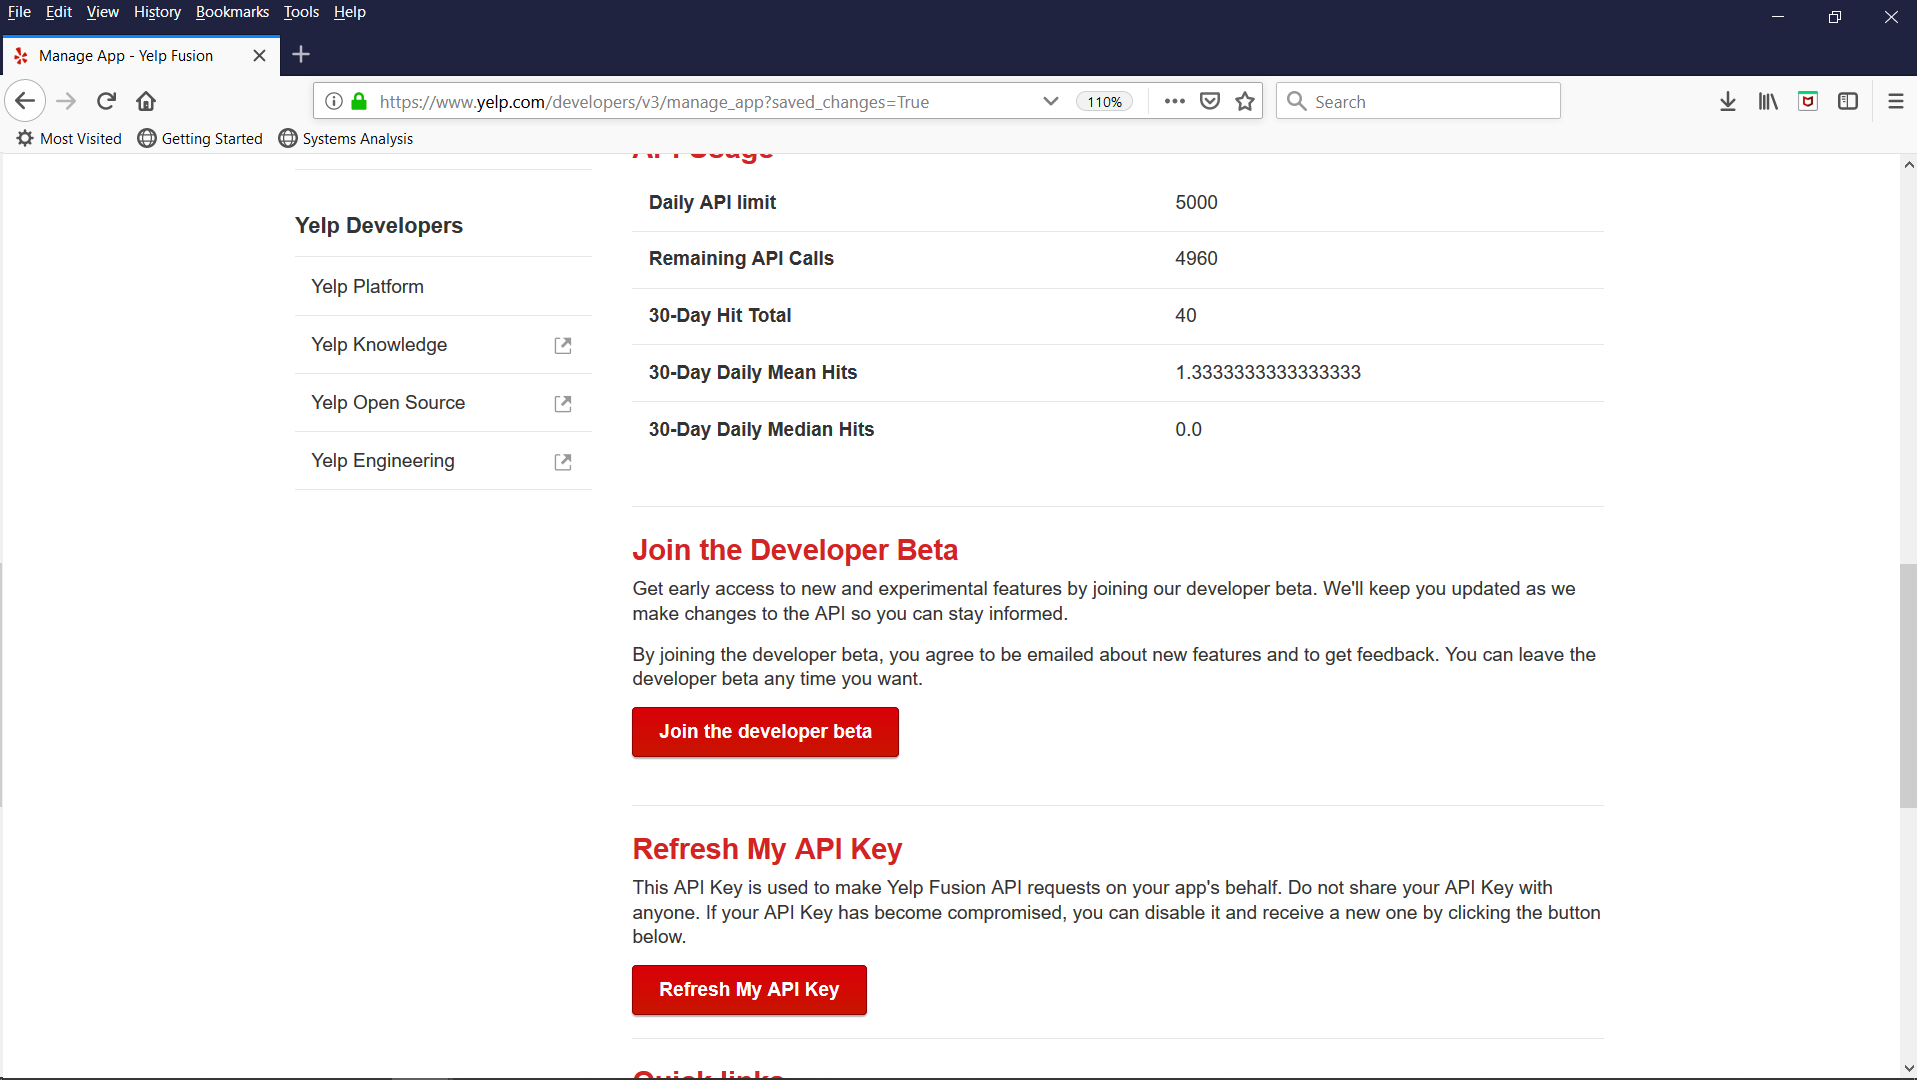

# Chicago Community Areas

We are interested in the community areas of downtown chicago:

- Chicago Loop
- West Town
- Near North Side Chicago
- Near South Side Chicago
- Near West Side Chicago


You can see the official list for the Boundaries of different Community Areas at the following URL:

https://www.chicago.gov/city/en/depts/doit/dataset/boundaries_-_communityareas.html


## Create your API Key before you proceed

Here is the URL for the developer API  in order to generate key

https://www.yelp.com/developers/v3/manage_app


In [2]:
from yelpapi import YelpAPI

from pprint import pprint

yelp_api = YelpAPI('ynJnUBiQZGXucmMnjiX_1M_yozbCecjhPDCs4MHuiUP9ct5dX311gYnA6PkLKIDK0fIYyEUGC6eRH7U0V4g26wxObaIBEcQKhm5YiWBZ8aIZsXIaJXR_uqUQvF1vXHYx')




Please note that yelp limits the number businesses retruned to **50** so we need to spin through a loop tp retrieve the maximum number taht we can get from Yelp; the limit is 1000 businesses. And you are also limited to 5000 API calls per day.

The API business search docymentation is available at the following URL: https://www.yelp.com/developers/documentation/v3/business_search

Make a note of the following documentations **copied from Yelp API** for parameters limit and total:

- **limit** : The default number of business results to return is  20 and the Maximum limit can be set is 50.
- **total** :  	Total number of business Yelp finds based on the search criteria. Sometimes, the value may exceed 1000. In such case, you still can only get up to 1000 businesses. total may be limited to 40 for non-default sorts such as "distance" and "review_count".


Read the following question/amswer copied from (https://www.yelp.com/developers/faq) to see how to get the 1000 businesses:

**How do I get more than 50 results per request and how to get more than 1000 businesses?**

- The API can only return up to 1,000 results at this time. The API doesn't allow more than 50 per request. You need to use the offset parameter to get the next page of results. (For using offset, give it any number. If you have limit=50, that means you're getting results 1-50, so give it offset=51 and you'll get 51-100.)


**Warning:**If you attempt tp retrieve more than 1000 businesses you get the following error:




There are certain categories that are recognized by Yelp and accordingly index their reviews.
Visit the following URL to see the list: https://www.yelp.com/developers/documentation/v3/all_category_list

For **Chicago Social Hub**, we will collect businesses in the following categories
- Restaurants
- Entertainment
- Nightlife


In [3]:
import pandas as pd

df__business_reviews = pd.DataFrame()
list__business_reviews_documents = []


In [4]:
for x in range(20):
    response = yelp_api.search_query(categories='Restaurants+Entertainment+Nightlife', 
                                 location='Chicago Loop, West Town, Near West Side Chicago, Near North Side Chicago, Near South Side Chicago,chicago, il', 
                                 sort_by='rating', limit=50, offset=x*50)
    df__business_reviews = df__business_reviews.append(pd.DataFrame(response['businesses']))

    for review in response['businesses']:
        index_review = {  
            "_index": "chicago_yelp_reviews",
            "_type": "yelp_review",
            "_id": review['id'],
            "_source": review
        }
        list__business_reviews_documents.append(index_review)                      

    


In [5]:
df__business_reviews.tail()

alias  \
44                             subway-chicago-198   
45                         71st-chop-suey-chicago   
46                     j-j-and-atomic-sub-chicago   
47  55th-street-shopping-mall-parking-lot-chicago   
48            sammys-grill-and-restaurant-chicago   

                                           categories  \
44  [{'alias': 'hotdogs', 'title': 'Fast Food'}, {...   
45         [{'alias': 'chinese', 'title': 'Chinese'}]   
46  [{'alias': 'restaurants', 'title': 'Restaurant...   
47  [{'alias': 'localflavor', 'title': 'Local Flav...   
48       [{'alias': 'hotdogs', 'title': 'Fast Food'}]   

                                          coordinates   display_phone  \
44  {'latitude': 41.7911835, 'longitude': -87.5982...  (773) 834-1018   
45  {'latitude': 41.7658949, 'longitude': -87.6124...  (773) 488-5488   
46     {'latitude': 41.77695, 'longitude': -87.60626}  (773) 667-6061   
47     {'latitude': 41.79511, 'longitude': -87.59327}                   
48     {'latitude': 41.77856, 'longitude': -87.61524}  (773) 955-7900   

       distance                      id  \
44  1422.127660  GuwTueWW8YXekF4SfxulCA   
45  1648.600849  KwDlx1cb_dkKzTBVRg6Whw   
46   367.604213  wEAM8xZySKmadN4CHw939A   
47  1925.866542  L3nuLrrJ7dLLw23ldv0Mtw   
48   715.207524  hPe-frQ9rKDCrbtaFfiYIw   

                                            image_url  is_closed  \
44                                                         False   
45                                                         False   
46  https://s3-media2.fl.yelpcdn.com/bphoto/X7Jz0Q...      False   
47                                                         False   
48  https://s3-media2.fl.yelpcdn.com/bphoto/uJZORe...      False   

                                             location  \
44  {'address1': '5706 University Ave', 'address2'...   
45  {'address1': '510 E 71st St', 'address2': '', ...   
46  {'address1': '6458 S Cottage Grove Ave', 'addr...   
47  {'address1': '55TH St', 'address2': '', 'addre...   
48  {'address1': '6359 S King Dr', 'address2': Non...   

                                     name         phone price  rating  \
44                                 Subway  +17738341018     $     2.0   
45                         71st Chop Suey  +17734885488   NaN     1.0   
46                       J J & Atomic Sub  +17736676061   NaN     1.0   
47  55th street Shopping Mall Parking Lot                 NaN     1.0   
48           Sammy's Grill and Restaurant  +17739557900   NaN     1.0   

    review_count        transactions  \
44             1                  []   
45             2  [pickup, delivery]   
46             1                  []   
47             1                  []   
48             1                  []   

                                                  url  
44  https://www.yelp.com/biz/subway-chicago-198?ad...  
45  https://www.yelp.com/biz/71st-chop-suey-chicag...  
46  https://www.yelp.com/biz/j-j-and-atomic-sub-ch...  
47  https://www.yelp.com/biz/55th-street-shopping-...  
48  https://www.yelp.com/biz/sammys-grill-and-rest...

In [6]:
df__business_reviews.describe()

distance      rating  review_count
count    149.000000  149.000000    149.000000
mean    1810.634015    3.439597     63.805369
std     1010.630161    0.981093    129.783483
min       90.105758    1.000000      1.000000
25%     1403.260691    3.000000      4.000000
50%     1844.294621    3.500000     21.000000
75%     2291.161629    4.000000     61.000000
max    11238.599708    5.000000   1086.000000

## Chicago-Style Food

Chicago is famous for **Chicago-style deep-dish** and you can read more about the origin of this term at the following link for the Chicago Tribune article: https://www.chicagotribune.com/news/ct-xpm-2009-02-18-0902180055-story.html, but Chicago is also know for its chicago-style-hot-dogs, https://en.wikipedia.org/wiki/Chicago-style_hot_dog.



When people visit Chicago, they like to taste these two types of food  that got Chicago signature:
- Pizza 
- Hot Dogs


Fo illustration purposes, we will consider the following two  famous restaurants in Chicago downtown:
- Portillo's - For Chicago Style Hot Dogs
- Giordano's - For Chicago-Style Pizza


**Note 1:**
Some of the business names might appear multiple timeas and accordingly leads to the conclusion that the dataset has redundant documents but that is not correct since a Restaruant Chain might have the same business name in  different locations and that is captured under the alias.

Here is an example for Potbelly Sandwich Shop:

'alias': 'potbelly-sandwich-shop-chicago-25'
'name': 'Potbelly Sandwich Shop',

'alias': 'potbelly-sandwich-shop-chicago-10'
'name': 'Potbelly Sandwich Shop'

**Note 2:**
Yelp reviews might refer to business names with or without **s** at the end of the business name. For exmple you might see reviews for business names:
- Portillo's or Portillo
- Giordano's or Giordano



In [7]:
df__business_reviews.name.value_counts()

Subway                                               4
McDonald's                                           3
Starbucks                                            3
Pizza Hut                                            2
Burger King                                          2
Shark's Fish & Chicken                               2
Dunkin' Donuts                                       2
Church's Chicken                                     2
Greenline Coffee                                     1
Museum of Science and Industry                       1
Sammy's Grill and Restaurant                         1
Hall of Jellyfish                                    1
Fountain of Time                                     1
Sunny Sub                                            1
DuSable Museum Of African American History           1
Jimmy John's                                         1
La Petite Folie                                      1
Peach's at Currency Exchange Cafe                    1
Seven Ten 

In [8]:
pprint(list__business_reviews_documents)


[{'_id': '6XTCsnjpa_fC_yjvvGbXQQ',
  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'lstc-refectory-chicago-2',
              'categories': [{'alias': 'cafeteria', 'title': 'Cafeteria'},
                             {'alias': 'tacos', 'title': 'Tacos'},
                             {'alias': 'breakfast_brunch',
                              'title': 'Breakfast & Brunch'}],
              'coordinates': {'latitude': 41.795710987436,
                              'longitude': -87.5984633193176},
              'display_phone': '(773) 256-0702',
              'distance': 1866.1861017920596,
              'id': '6XTCsnjpa_fC_yjvvGbXQQ',
              'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/yNiE1pU_C5-XL0N9LiAb2g/o.jpg',
              'is_closed': False,
              'location': {'address1': '1100 E 55th St',
                           'address2': '',
                           'address3': '',
                           'city': 'Chicago',
                           'c

                           'address2': '',
                           'address3': '',
                           'city': 'Chicago',
                           'country': 'US',
                           'display_address': ['5311 S Lake Park Ave W',
                                               'Chicago, IL 60615'],
                           'state': 'IL',
                           'zip_code': '60615'},
              'name': 'The Promontory',
              'phone': '+13128012100',
              'price': '$$',
              'rating': 3.5,
              'review_count': 517,
              'transactions': [],
              'url': 'https://www.yelp.com/biz/the-promontory-chicago?adjust_creative=_xph361Kq2fNnlj5vG31SQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_xph361Kq2fNnlj5vG31SQ'},
  '_type': 'yelp_review'},
 {'_id': 'Zx87qmviYtwDOyBJah213g',
  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'medici-on-57th-chicago',
              'categories': [{'al

  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'dusable-museum-of-african-american-history-chicago',
              'categories': [{'alias': 'museums', 'title': 'Museums'}],
              'coordinates': {'latitude': 41.7916443, 'longitude': -87.6067949},
              'display_phone': '(773) 947-0600',
              'distance': 1309.1953433696742,
              'id': 'mM-JHEwNrkEQQ76Z3ycpCQ',
              'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/oT1095PLk3CUCM0I9uk5zQ/o.jpg',
              'is_closed': False,
              'location': {'address1': '740 E 56th Pl',
                           'address2': '',
                           'address3': '',
                           'city': 'Chicago',
                           'country': 'US',
                           'display_address': ['740 E 56th Pl',
                                               'Chicago, IL 60637'],
                           'state': 'IL',
                           'zip_code': '60637'},
    

              'review_count': 151,
              'transactions': ['delivery', 'pickup'],
              'url': 'https://www.yelp.com/biz/pho-55-chicago?adjust_creative=_xph361Kq2fNnlj5vG31SQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_xph361Kq2fNnlj5vG31SQ'},
  '_type': 'yelp_review'},
 {'_id': 'n31ooosroQEKzSfMuI_nfw',
  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'washington-park-chicago',
              'categories': [{'alias': 'parks', 'title': 'Parks'}],
              'coordinates': {'latitude': 41.793764, 'longitude': -87.615893},
              'display_phone': '(773) 256-1248',
              'distance': 1689.4062019612497,
              'id': 'n31ooosroQEKzSfMuI_nfw',
              'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/zTP_FWrdTMgGCnBEr2gowQ/o.jpg',
              'is_closed': False,
              'location': {'address1': '5531 S Martin Luther King Dr',
                           'address2': '',
                           'add

              'location': {'address1': '1155 E 57th St',
                           'address2': '',
                           'address3': '',
                           'city': 'Chicago',
                           'country': 'US',
                           'display_address': ['1155 E 57th St',
                                               'Chicago, IL 60637'],
                           'state': 'IL',
                           'zip_code': '60637'},
              'name': 'Quadrangle Club',
              'phone': '+17737027221',
              'price': '$$',
              'rating': 4.0,
              'review_count': 25,
              'transactions': [],
              'url': 'https://www.yelp.com/biz/quadrangle-club-chicago?adjust_creative=_xph361Kq2fNnlj5vG31SQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_xph361Kq2fNnlj5vG31SQ'},
  '_type': 'yelp_review'},
 {'_id': '5CQrpQaBg1J-CA-skw-HSA',
  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'ex-libri

              'price': '$$',
              'rating': 3.5,
              'review_count': 29,
              'transactions': [],
              'url': 'https://www.yelp.com/biz/insomnia-cookies-chicago-6?adjust_creative=_xph361Kq2fNnlj5vG31SQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_xph361Kq2fNnlj5vG31SQ'},
  '_type': 'yelp_review'},
 {'_id': 'x0SXcZg0Vb98yebCrn00eQ',
  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'parkway-hoagies-chicago',
              'categories': [{'alias': 'sandwiches', 'title': 'Sandwiches'}],
              'coordinates': {'latitude': 41.77729, 'longitude': -87.61521},
              'display_phone': '(773) 752-6300',
              'distance': 767.7707747144168,
              'id': 'x0SXcZg0Vb98yebCrn00eQ',
              'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/HX1rFLmp0k1VD9Q_-03b9A/o.jpg',
              'is_closed': False,
              'location': {'address1': '6437 1/2 S King Dr',
                           '

              'phone': '+17736841414',
              'price': '$$',
              'rating': 2.5,
              'review_count': 24,
              'transactions': [],
              'url': 'https://www.yelp.com/biz/the-brain-food-court-chicago?adjust_creative=_xph361Kq2fNnlj5vG31SQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_xph361Kq2fNnlj5vG31SQ'},
  '_type': 'yelp_review'},
 {'_id': '2xb64T0iPhrVbqoTvYuUIQ',
  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'cobb-coffee-shop-chicago',
              'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}],
              'coordinates': {'latitude': 41.7900565, 'longitude': -87.6010614},
              'display_phone': '',
              'distance': 1097.4924210811282,
              'id': '2xb64T0iPhrVbqoTvYuUIQ',
              'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/1sA7TO9FDwC4o3XVC8l4cw/o.jpg',
              'is_closed': False,
              'location': {'address1': '5811 S Ellis',
   

              'distance': 1787.4176146457,
              'id': 'hzyqrjSPX4VeEoJBbn-uXw',
              'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/3yLDm99tmF6cystFkGjGOw/o.jpg',
              'is_closed': False,
              'location': {'address1': '6 W 59th St',
                           'address2': '',
                           'address3': '',
                           'city': 'Chicago',
                           'country': 'US',
                           'display_address': ['6 W 59th St',
                                               'Chicago, IL 60621'],
                           'state': 'IL',
                           'zip_code': '60621'},
              'name': "Church's Chicken",
              'phone': '+17736671055',
              'price': '$',
              'rating': 3.0,
              'review_count': 6,
              'transactions': [],
              'url': 'https://www.yelp.com/biz/churchs-chicken-chicago-10?adjust_creative=_xph361Kq2fNnlj5vG31SQ&utm_camp

              'name': 'Curried Food Truck',
              'phone': '',
              'rating': 5.0,
              'review_count': 1,
              'transactions': [],
              'url': 'https://www.yelp.com/biz/curried-food-truck-chicago-2?adjust_creative=_xph361Kq2fNnlj5vG31SQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_xph361Kq2fNnlj5vG31SQ'},
  '_type': 'yelp_review'},
 {'_id': '_yBww6MlZ321QIp7cIuyBQ',
  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'stagg-field-tennis-courts-chicago',
              'categories': [{'alias': 'landmarks',
                              'title': 'Landmarks & Historical Buildings'}],
              'coordinates': {'latitude': 41.7944725602865,
                              'longitude': -87.6014077663422},
              'display_phone': '(773) 702-7684',
              'distance': 1651.799741892861,
              'id': '_yBww6MlZ321QIp7cIuyBQ',
              'image_url': '',
              'is_closed': False,
       

                           'zip_code': '60637'},
              'name': 'QDOBA Mexican Eats',
              'phone': '+17739261365',
              'rating': 4.0,
              'review_count': 1,
              'transactions': [],
              'url': 'https://www.yelp.com/biz/qdoba-mexican-eats-hyde-park-3?adjust_creative=_xph361Kq2fNnlj5vG31SQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_xph361Kq2fNnlj5vG31SQ'},
  '_type': 'yelp_review'},
 {'_id': 'gqKnA5dnu4pZL-5CHvjGlw',
  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'hall-of-jellyfish-chicago',
              'categories': [{'alias': 'landmarks',
                              'title': 'Landmarks & Historical Buildings'}],
              'coordinates': {'latitude': 41.7969709, 'longitude': -87.5890553},
              'display_phone': '(914) 330-5009',
              'distance': 2383.8736886262063,
              'id': 'gqKnA5dnu4pZL-5CHvjGlw',
              'image_url': 'https://s3-media2.fl.yelpcdn.c

  '_index': 'chicago_yelp_reviews',
  '_source': {'alias': 'sammys-grill-and-restaurant-chicago',
              'categories': [{'alias': 'hotdogs', 'title': 'Fast Food'}],
              'coordinates': {'latitude': 41.77856, 'longitude': -87.61524},
              'display_phone': '(773) 955-7900',
              'distance': 715.2075240198768,
              'id': 'hPe-frQ9rKDCrbtaFfiYIw',
              'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/uJZORekRdFaOmJeRc3uH2Q/o.jpg',
              'is_closed': False,
              'location': {'address1': '6359 S King Dr',
                           'address2': None,
                           'address3': None,
                           'city': 'Chicago',
                           'country': 'US',
                           'display_address': ['6359 S King Dr',
                                               'Chicago, IL 60637'],
                           'state': 'IL',
                           'zip_code': '60637'},
              'n

In [9]:
# The following code  writes the data to a file  in case data needed for debugging purposes
import json

output_file = open('chicago-yelp-reviews-for-es.json', 'w', encoding='utf-8')

for dic in list__business_reviews_documents:
    json.dump(dic, output_file) 
    output_file.write("\n")
    


### Load and Index the Yelp Reviews for Chicago Businesses  into ElasticSearch

Yelp reviews of Chicago Businesses are insreted into ElasticSearch engine using the bulk Api of elastic search. 

Here is the link __[API DOCS](http://elasticsearch-py.readthedocs.io/en/master/helpers.html)__ for the API documentation. 

In [10]:
#Import Elascticsearch and helpers from  elasticsearch

from elasticsearch import Elasticsearch, helpers 

es = Elasticsearch()

In [11]:
# Start the bulk document-indexing
    
helpers.bulk(es, list__business_reviews_documents)       

(149, [])

## Sanity Test:

Execute following commands from the command window/terminal:

**To verify the index got created:**
- curl -XGET "http://localhost:9200/_cat/indices?v"


**To dump the documents in the index to stdout:**
- curl -XGET "http://localhost:9200/chicago_yelp_reviews/yelp_review/_search?pretty=true"

**To dump the mapping of  the index to stdout:**
- curl -XGET "localhost:9200/chicago_yelp_reviews/_mapping/yelp_review?pretty"


## How to delete  the index?
**To delete the index you created:**
- curl -XDELETE "http://localhost:9200/chicago_yelp_reviews?pretty"

